In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This file concerns credit card applications. 

All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, 
and nominal with larger numbers of values. There are also a few missing values.

The source is http://archive.ics.uci.edu/ml/datasets/Credit+Approval
    
The values from A1 to A15 represent features that would lead to a + o - (positive or negative) credit card approval application.

### Import the data, replace the Class field, check missing values

In [2]:
df=pd.read_csv('credit_card.csv')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
df['Class'].replace(to_replace=['+','-'], value=[1,0],inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [4]:
df2 = df_sales[:10] 

In [5]:
y= df['Class'].values

In [6]:
df.describe()

,A3,A8,A11,A15,Class
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [7]:
#df["A2"] = pd.to_numeric(df["A2"])
#df["A14"] = pd.to_numeric(df["A14"])
#df['A2'].str.contains('-')
df.isin(['?']).sum(axis=0)

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [8]:
df.loc[df['A2']=='?']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,0
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,928,0,0
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,0
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,0
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,380,2010,0
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200,105,0
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,411,0,0
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,0
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,0,1,0
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,290,2279,1


### Substitute the ? to actual number in the numerical column

In [9]:
df['A2'] = df['A2'].replace('?', 
    np.mean(pd.to_numeric(df['A2'], errors='coerce')))

In [10]:
df['A2']= pd.to_numeric(df['A2'])

In [11]:
df['A14'] = df['A14'].replace('?', 
    np.mean(pd.to_numeric(df['A14'], errors='coerce')))


In [12]:
df['A14']= pd.to_numeric(df['A14'])

### Substitute the ? in the categorical column

In [13]:
df['A4'] = df['A4'].replace('?', 
    np.mean(pd.to_numeric(df['A4'], errors='coerce')))

df['A5'] = df['A5'].replace('?', 
    np.mean(pd.to_numeric(df['A5'], errors='coerce')))

df['A6'] = df['A6'].replace('?', 
    np.mean(pd.to_numeric(df['A6'], errors='coerce')))

df['A7'] = df['A7'].replace('?', 
    np.mean(pd.to_numeric(df['A7'], errors='coerce')))

In [14]:
df['A1'] = df['A1'].replace('?', 
    np.mean(pd.to_numeric(df['A1'], errors='coerce')))

In [15]:
df.isna().sum()

A1       12
A2        0
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
Class     0
dtype: int64

### Visualization plots and correlations


In [16]:
df[['A1','Class']].groupby('Class').count()

,A1
Class,
0,374
1,304


In [17]:
lista = ['A1','A4', 'A5', 'A6', 'A7','A9','A10','A12','A13']

for i in lista:
        print(df[['Class',i]].groupby(i).count())

    Class
A1       
a     210
b     468
    Class
A4       
l       2
u     519
y     163
    Class
A5       
g     519
gg      2
p     163
    Class
A6       
aa     54
c     137
cc     41
d      30
e      25
ff     53
i      59
j      10
k      51
m      38
q      78
r       3
w      64
x      38
    Class
A7       
bb     59
dd      6
ff     57
h     138
j       8
n       4
o       2
v     399
z       8
    Class
A9       
f     329
t     361
     Class
A10       
f      395
t      295
     Class
A12       
f      374
t      316
     Class
A13       
g      625
p        8
s       57


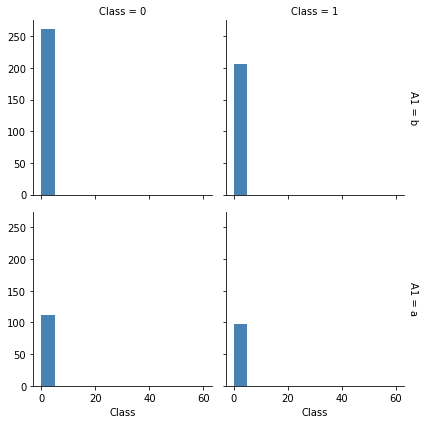

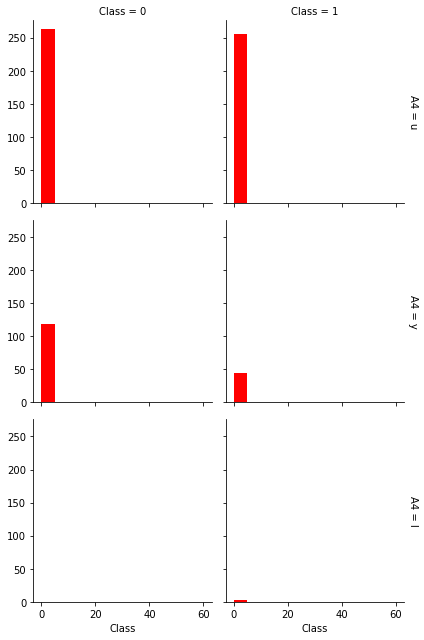

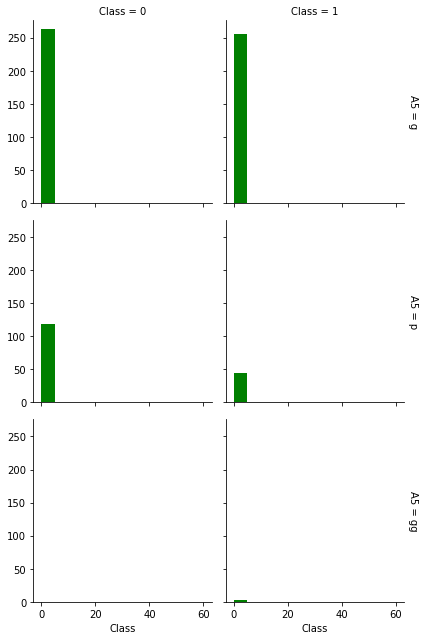

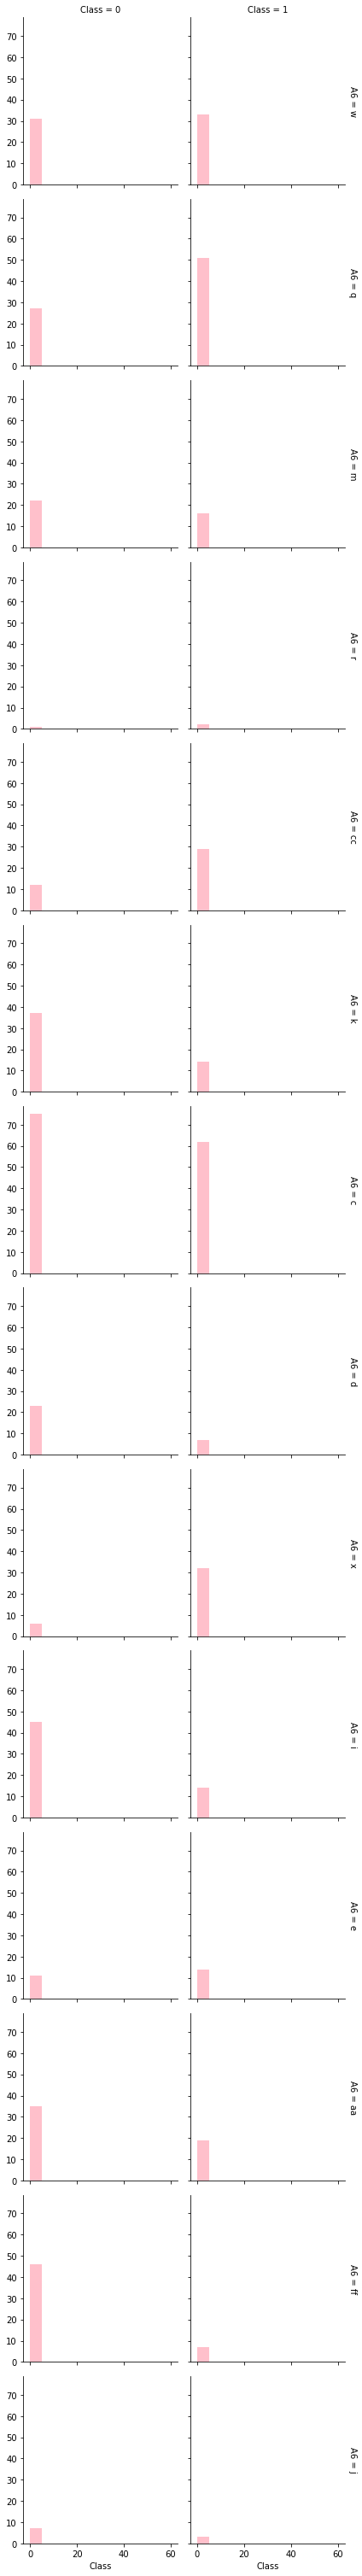

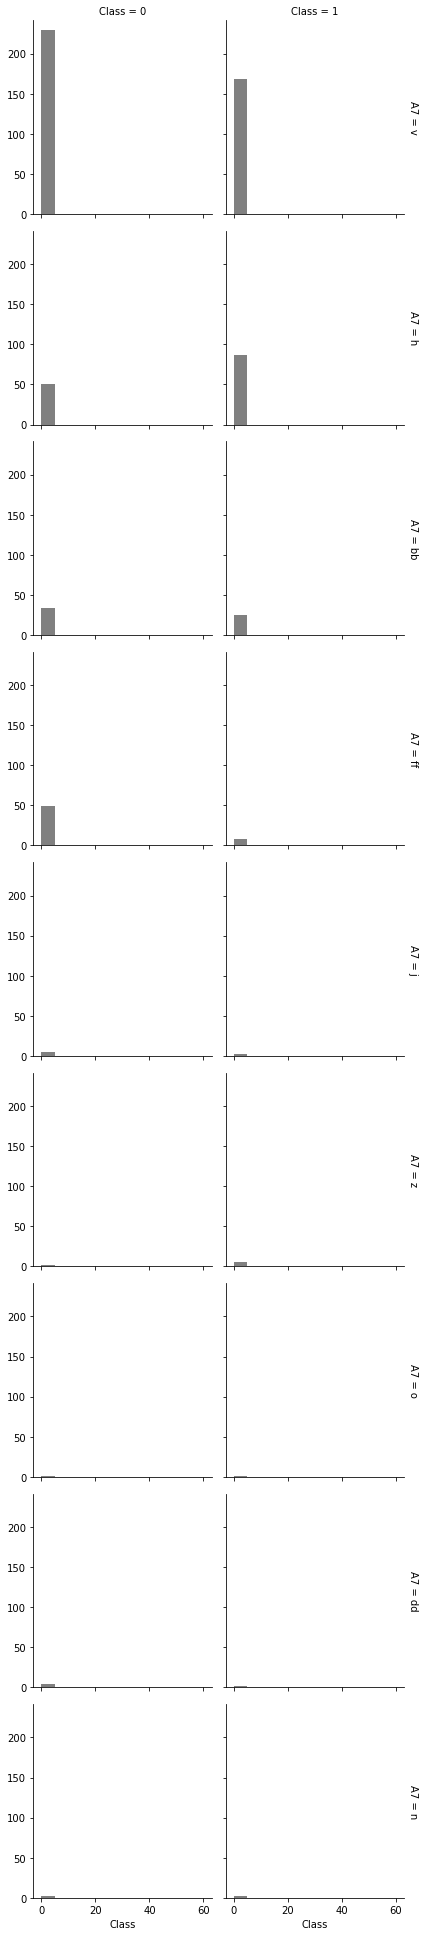

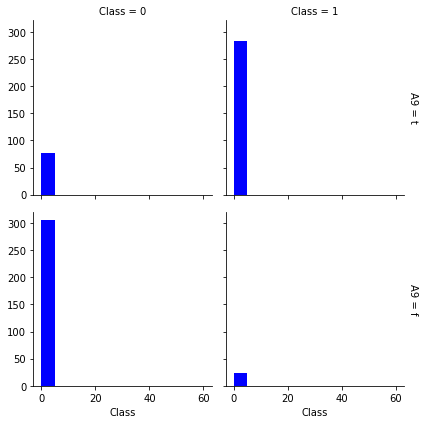

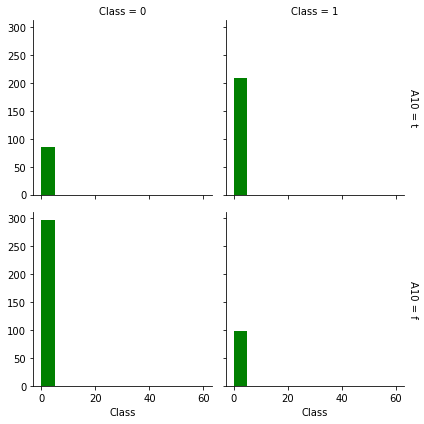

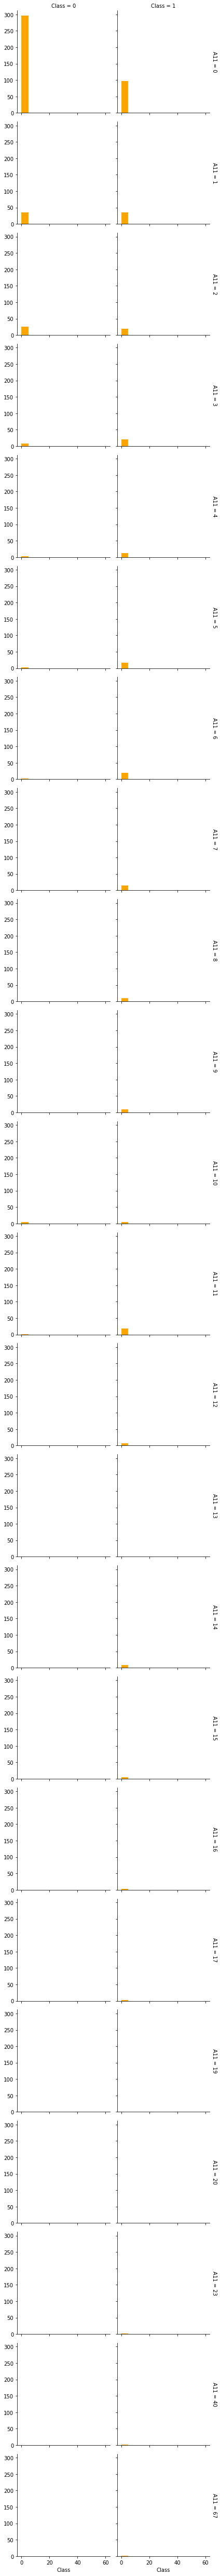

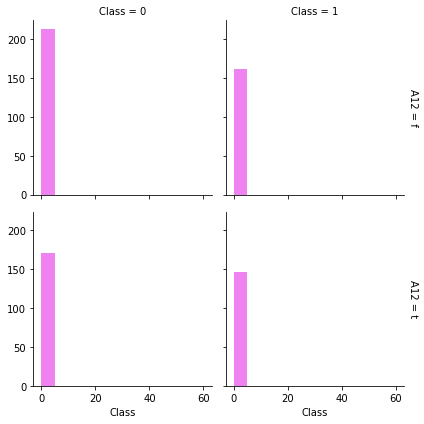

In [18]:
#tips = sns.load_dataset("tips")

#lista = ['A1','A4', 'A5', 'A6', 'A7','A9','A10','A12','A13']
g = sns.FacetGrid(df, row="A1", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Class", color="steelblue", bins=bins)
    
n = sns.FacetGrid(df, row="A4", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
n.map(plt.hist, "Class", color="red", bins=bins)

k = sns.FacetGrid(df, row="A5", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
k.map(plt.hist, "Class", color="green", bins=bins)

j = sns.FacetGrid(df, row="A6", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
j.map(plt.hist, "Class", color="pink", bins=bins)

pp = sns.FacetGrid(df, row="A7", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
pp.map(plt.hist, "Class", color="grey", bins=bins)


r = sns.FacetGrid(df, row="A9", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
r.map(plt.hist, "Class", color="blue", bins=bins)

o = sns.FacetGrid(df, row="A10", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
o.map(plt.hist, "Class", color="green", bins=bins)

w = sns.FacetGrid(df, row="A11", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
w.map(plt.hist, "Class", color="orange", bins=bins)

l = sns.FacetGrid(df, row="A12", col="Class", margin_titles=True)
bins = np.linspace(0, 60, 13)
l.map(plt.hist, "Class", color="violet", bins=bins)

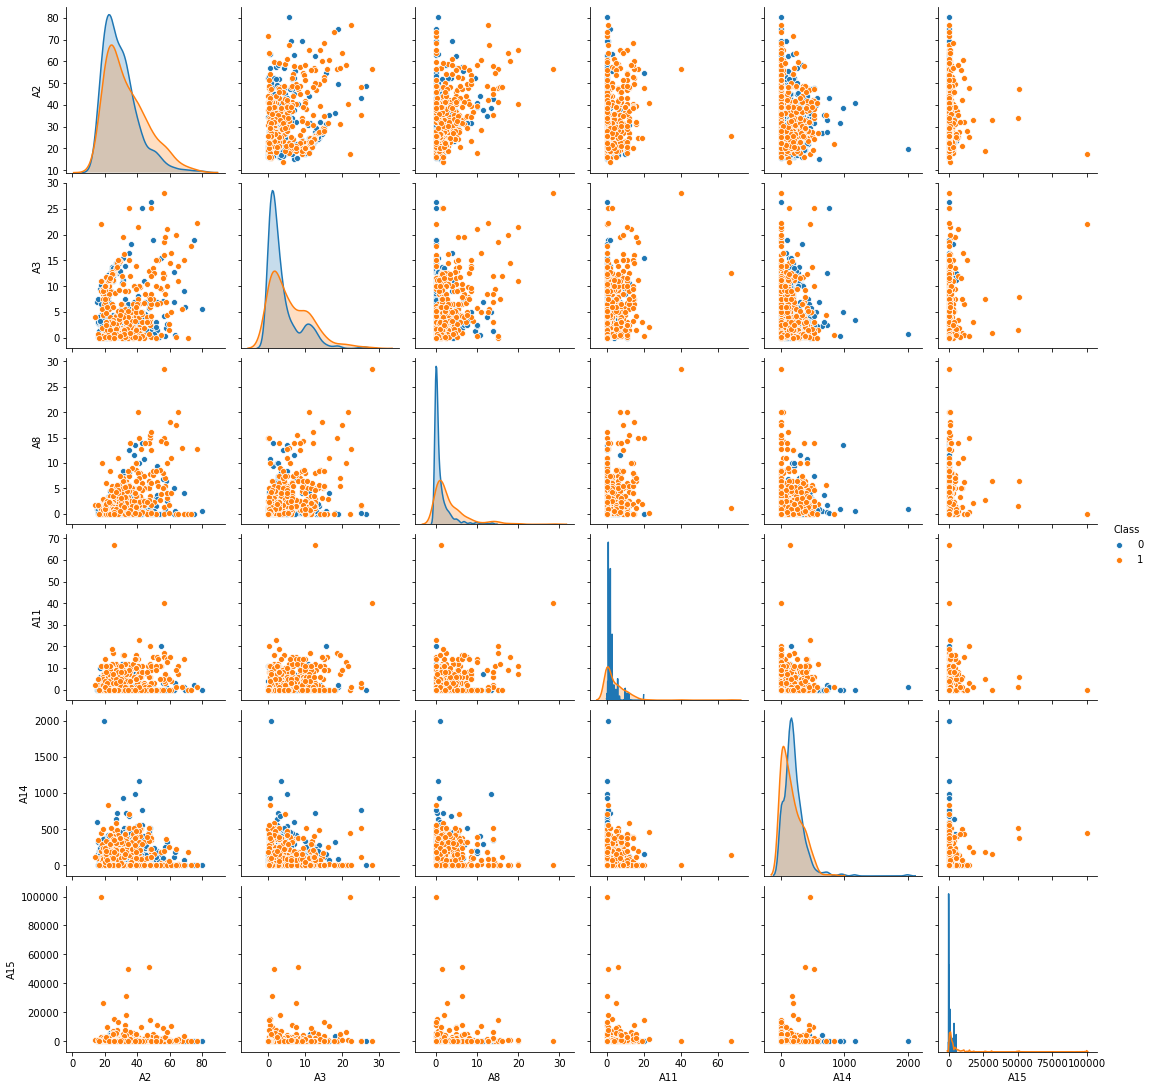

In [19]:
g = sns.pairplot(df, hue="Class")


In [20]:
# nas?
#Visualize
#correlation? and drop
#one hot encoder
#standard scaler
#reduce inputs? PCA?
# cross val and train test with : logistic regression, SVR, random forest
#grid seach them


#https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
#https://medium.com/@ashish.tripathi1207/credit-card-approval-prediction-model-in-python-c0e07677058e

### Visualization plots and correlations

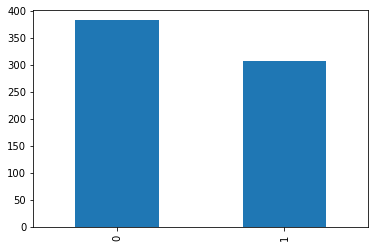

In [21]:
df['Class'].value_counts().plot(kind='bar')


#### Numerical variables explorations

In [22]:
numerical = [ 'A2',
  'A3', 'A8', 'A11','A14','A15'
]
categorical = [
  'A1','A4', 'A5', 'A6', 'A7','A9','A10','A12','A13'
]

df = df[numerical + categorical]
df.shape

(690, 15)

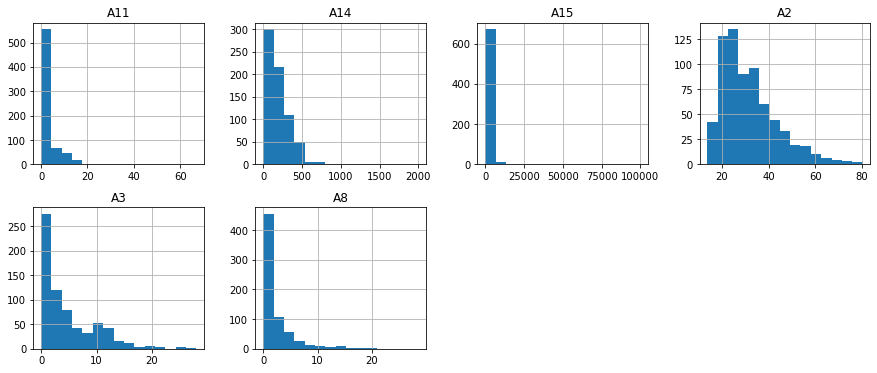

In [23]:
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

#### Categorical variable exploration

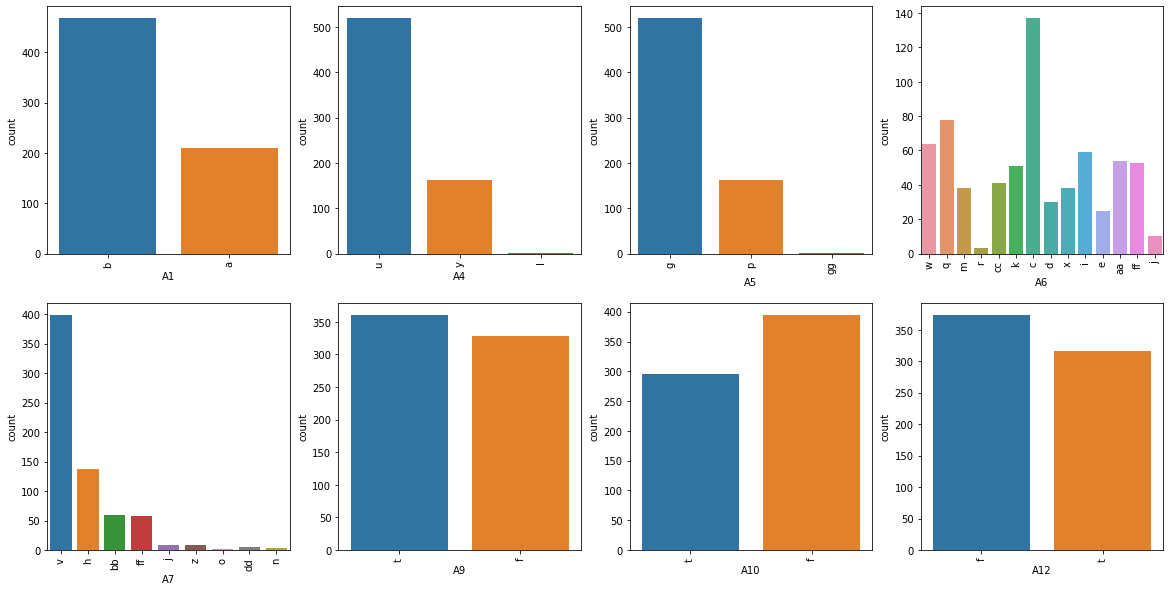

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Correlation plot of numerical variables

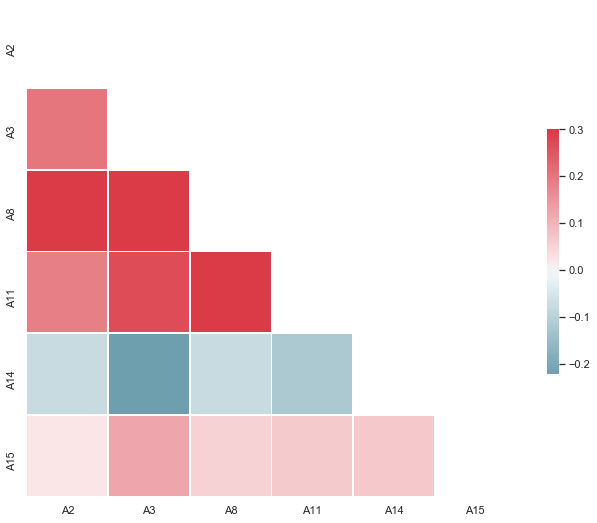

In [25]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Model preparation : Label Encoder and standard scaler

In [26]:
from sklearn import preprocessing


In [27]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(df)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [29]:
from sklearn.preprocessing import StandardScaler
df_data = df.values

X = df_data[:,0:15]
X= preprocessing.StandardScaler().fit(X).transform(X)


In [30]:
df.head()

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,30.83,0.000,1.25,1,202.0,0,1,1,0,12,7,1,1,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,10,3,1,1,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,10,3,1,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,0,12,7,1,1,1,0
4,20.17,5.625,1.71,0,120.0,0,1,1,0,12,7,1,0,0,2


In [31]:
#for column in ['A1']:
 #   dummies = pd.get_dummies(df[column])
  #  df[dummies.columns] = dummies
#df.drop(['A1', 'b'], axis = 1, inplace=True) 

In [32]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [33]:
X.shape

(690, 15)

In [34]:
y.shape

(690,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### Use logistic regression 

In [36]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression().fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
y_pred4 = LR_model.predict(X_test)
LR_f1= f1_score(y_test, y_pred4)
LR_j= jaccard_similarity_score(y_test, y_pred4)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [38]:
print(LR_f1)
print(LR_j)

0.8032786885245901
0.8260869565217391


In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
from sklearn.linear_model import LogisticRegression
grid_params4 = {'penalty': ['l1', 'l2'], 'C': [0.5,1,0.25]}
gs4 = GridSearchCV(LogisticRegression(),grid_params4,cv=10)
gs4_results = gs4.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [41]:
gs4_results.best_params_

{'C': 0.25, 'penalty': 'l1'}

In [42]:
gs4_results.best_score_

0.8695652173913043

In [43]:
LRmodel=LogisticRegression(C=0.25, penalty='l1')
LRmodel.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = LRmodel.predict(X_test)
LRf1= f1_score(y_test, y_pred)
LRj= jaccard_similarity_score(y_test, y_pred)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [45]:
print(LRmodel.coef_, LRmodel.intercept_)

[[ 0.          0.          0.3146208   0.50649411 -0.01339799  0.74409607
  -0.01500851 -0.29154208  0.          0.17964057  0.04023975  1.54928565
   0.35602459 -0.14804406  0.        ]] [-0.29043293]


In [46]:
from sklearn.feature_selection import RFE
# Model to Test
classifier = LogisticRegression()
rfe = RFE(classifier, 10)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
df.columns[rfe.support_]

[False False  True  True False  True False  True  True  True  True  True
  True  True False]
[5 6 1 1 3 1 2 1 1 1 1 1 1 1 4]


C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Index(['A8', 'A11', 'A15', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12'], dtype='object')

In [47]:
print(LRf1)
print(LRj)

0.8188976377952756
0.8333333333333334


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.31462
Feature: 3, Score: 0.50649
Feature: 4, Score: -0.01340
Feature: 5, Score: 0.74410
Feature: 6, Score: -0.01501
Feature: 7, Score: -0.29154
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.17964
Feature: 10, Score: 0.04024
Feature: 11, Score: 1.54929
Feature: 12, Score: 0.35602
Feature: 13, Score: -0.14804
Feature: 14, Score: 0.00000


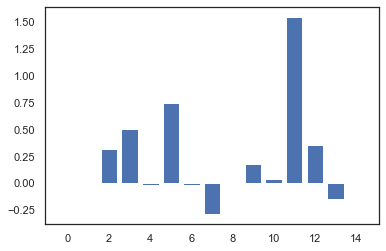

In [79]:
# get importance
from matplotlib import pyplot

importance = LRmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [82]:
# The estimated coefficients will all be around 1:
print(LRmodel.coef_)

# Those values, however, will show that the second parameter
# is more influential
#print(np.std(X, 0)*LRmodel.coef_)

[[ 0.          0.          0.3146208   0.50649411 -0.01339799  0.74409607
  -0.01500851 -0.29154208  0.          0.17964057  0.04023975  1.54928565
   0.35602459 -0.14804406  0.        ]]


### Use SVR

In [49]:
from sklearn import svm
SVCmodel=svm.SVC()
SVCmodel.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred3 = SVCmodel.predict(X_test)
SVM_f1 = f1_score(y_test, y_pred3)
SVM_j = jaccard_similarity_score(y_test, y_pred3)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [51]:
print(SVM_f1)
print(SVM_j)

0.8360655737704917
0.855072463768116


In [52]:
from sklearn import svm
grid_params3 = {'kernel': ['rbf', 'linear','poly'], 'C': [0.5,1,0.25], 'gamma': [0.5,1,0.25]}
gs3 = GridSearchCV(svm.SVC(),grid_params3,cv=10)
gs3_results = gs3.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
gs3_results.best_params_

{'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}

In [54]:
gs3_results.best_score_


0.8659420289855072

In [55]:
SVC_model=svm.SVC(kernel='rbf', C=0.25, gamma = 0.25)
SVC_model.fit(X_train,y_train)

SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred10 = SVCmodel.predict(X_test)
SVMf1 = f1_score(y_test, y_pred10)
SVMj = jaccard_similarity_score(y_test, y_pred10)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [57]:
print(SVMf1)
print(SVMj)

0.8360655737704917
0.855072463768116


### Use Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred6 = RF.predict(X_test)
RF_f1 = f1_score(y_test, y_pred6)
RF_j = jaccard_similarity_score(y_test, y_pred6)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [60]:
print(RF_f1)
print(RF_j)

0.8148148148148148
0.855072463768116


In [61]:
grid_params20 = {'criterion': ['gini','entropy'], 'n_estimators': [10,20,50], 'max_depth' : [3,4,5,6,7,8,9,10]}

In [62]:
gs20 = GridSearchCV(RandomForestClassifier(),grid_params20,cv=10)

In [63]:
gs20_results = gs20.fit(X_train,y_train)

In [64]:
gs20_results.best_params_


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 20}

In [65]:
gs20_results.best_score_


0.8913043478260869

In [66]:
RF_model =RandomForestClassifier(criterion = 'gini', max_depth=7, n_estimators = 20)
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred70 = RF_model.predict(X_test)
DTreef1= f1_score(y_test, y_pred70)
DTreej= jaccard_similarity_score(y_test, y_pred70)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [68]:
print(DTreef1)
print(DTreej)

0.7850467289719627
0.8333333333333334


Feature ranking:
1. feature 11 (0.299734)
2. feature 3 (0.126402)
3. feature 2 (0.120337)
4. feature 12 (0.094502)
5. feature 5 (0.072322)
6. feature 9 (0.061702)
7. feature 1 (0.056276)
8. feature 4 (0.051507)
9. feature 0 (0.049931)
10. feature 10 (0.018654)
11. feature 7 (0.017510)
12. feature 6 (0.011072)
13. feature 14 (0.009264)
14. feature 13 (0.006391)
15. feature 8 (0.004396)


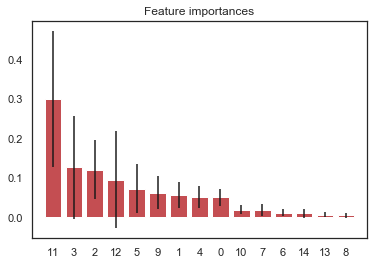

In [74]:
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

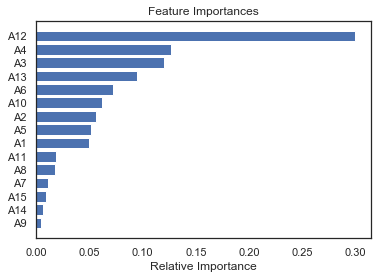

In [77]:
# copy of CC_data is in CC_data2
CC_data2 = df1.drop(['Class'], axis=1)

features = CC_data2.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Use PCA

In [69]:
from sklearn.decomposition import PCA
pca_cc = PCA(n_components=2)
principalComponents_cc = pca_cc.fit_transform(X)

In [70]:
principal_cc_Df = pd.DataFrame(data = principalComponents_cc
             , columns = ['principal component 1', 'principal component 2'])

In [71]:
print('Explained variation per principal component: {}'.format(pca_cc.explained_variance_ratio_))

Explained variation per principal component: [0.18690368 0.12276579]
